In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.utils import shuffle

from tools import plot_confusion_matrix

In [2]:
df = pd.read_csv('../data/datatran_2016-2017.csv', dtype={'br_str': str})
df.shape

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(180991, 32)

In [3]:
class0 = df[df.target==0].sample(10291)
class1 = df[df.target==1].sample(10291*3)
class2 = df[df.target==2]

df2 = shuffle(pd.concat([class0, class1, class2]))

In [4]:
dd = df2[['weekday', 'uf', 'br_str', 'km_int', 'accident_cause_simplified', 'accident_type', 
        'moment_of_day', 'climate', 'road_layout', 'target']]
dd = dd.dropna()

In [5]:
dd.target.value_counts()

1    30873
2    10291
0    10291
Name: target, dtype: int64

In [6]:
X = pd.get_dummies(dd.drop(['target'], axis=1))
y = dd['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB(priors=None)

In [9]:
y_pred = model.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

0.4672043533184336

Confusion matrix, without normalization
[[1517  355  207]
 [2855 2052 1183]
 [ 534  349 1239]]


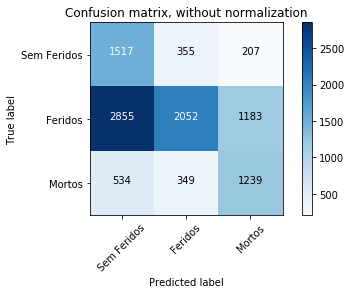

In [11]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Sem Feridos', 'Feridos', 'Mortos'],
                      title='Confusion matrix, without normalization')

In [12]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.31      0.73      0.43      2079
          1       0.74      0.34      0.46      6090
          2       0.47      0.58      0.52      2122

avg / total       0.60      0.47      0.47     10291

